In [29]:
import sys
import os
print(os.path.abspath('..'))
sys.path.append(os.path.abspath('..'))

import otter.gym as gym
import numpy as np
np.random.seed(0)
 

/home/drl/PycharmProjects/DeployedProjects/pararl


In [30]:

env_params = {
    "environment_name": "Reacher",
    "random_start": True,
    "random_target": True,
    "image": True,
    "image_dim": 64,
}
data_params=dict(
        num_rollouts=10,
        init_std=0.5,
        smooth_noise=False,
    )
horizon = 50

env = gym.from_config(env_params)

from scipy.ndimage import filters
def generate_noise(dims, std=1.0, smooth=False):
    if std == 0.0:
        return np.zeros(dims)
    noise = std * np.random.randn(*dims)
    if smooth:
        for j in range(dims[-1]):
            noise[..., j] = filters.gaussian_filter(noise[..., j], 2.0)
        emp_std = np.std(noise, axis=0)
        noise = std * (noise / emp_std)
    return noise

def noise_function():
    return generate_noise((horizon, env.get_action_dim()),
                               std= data_params['init_std'],
                               smooth= data_params['smooth_noise'])



In [31]:


num_rollouts =  data_params['num_rollouts']
policy = lambda _, __, ___, noise: noise

rollouts = env.rollouts(num_rollouts,  horizon, policy=policy, noise=noise_function, show_progress=True)

rollouts_d = (
    rollouts[0],
    rollouts[1],
    rollouts[2] - 0.5 * np.einsum('nta,ab,ntb->nt', rollouts[1], env.torque_matrix(), rollouts[1]),
    rollouts[3]
)


print('data is collected!')

Rollouts: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]

data is collected!


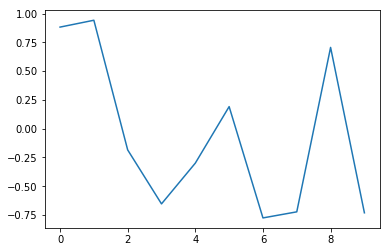

In [32]:
from matplotlib.pylab import plt
action0 = rollouts_d[1][:,0,0:1] 
plt.plot(action0)

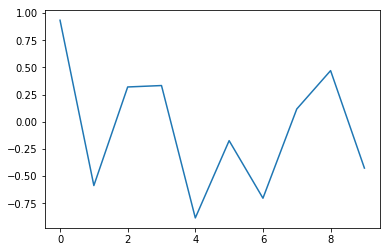

In [35]:
from matplotlib.pylab import plt
action0 = rollouts_d[1][:,2,0:1] 
plt.plot(action0)